Lesson 3.3: Convolutional Layers

In [1]:
%matplotlib inline

import numpy as np
from scipy.misc import face
from theano import tensor as T, function
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers.convolutional import  Convolution2D, MaxPooling2D

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Using Theano backend.


(768, 1024)


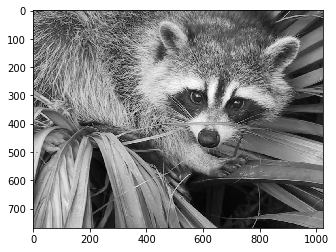

In [5]:
img = face(gray=True)
print(img.shape)
plt.imshow(img, cmap='gray')


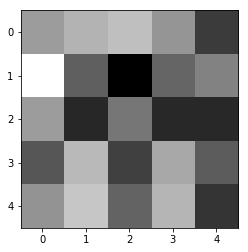

In [8]:
'''
w = [[0, 0, 0, 0, 0],
     [0, 0, -1, 0, 0],
     [0, -1, 4, -1, 0],
     [0, 0, -1, 0, 0],
     [0, 0, 0, 0, 0]]
w = np.asanyarray(w).reshape((1,1,5,5))
'''

w = np.random.randn(1, 1, 5, 5)

plt.imshow(w[0,0], cmap='gray')

In [197]:
X, W = T.tensor4s('X', 'W')
Y = T.nnet.conv2d(X, W,
                  border_mode='full',
                  input_shape=I.shape,
                  filter_shape=w.shape)
F = function([X, W], Y, allow_input_downcast=True)

WARNING (theano.tensor.opt): Failed to infer_shape from Op AbstractConv2d{convdim=2, border_mode='full', subsample=(1, 1), filter_flip=True, imshp=(1, 1, 768, 1024), kshp=(5, 5, 3), filter_dilation=(1, 1), num_groups=1, unshared=False}.
Input shapes: [(Shape_i{0}.0, Shape_i{1}.0, Shape_i{2}.0, Shape_i{3}.0), (Shape_i{0}.0, Shape_i{1}.0, Shape_i{2}.0, Shape_i{3}.0)]
Exception encountered during infer_shape: <class 'IndexError'>
Exception message: tuple index out of range
Traceback: Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/theano/tensor/opt.py", line 946, in get_node_infer_shape
    [self.shape_of[r] for r in node.inputs])
  File "/usr/local/lib/python3.6/dist-packages/theano/tensor/nnet/abstract_conv.py", line 2437, in infer_shape
    for i in range(2 + self.convdim)]
  File "/usr/local/lib/python3.6/dist-packages/theano/tensor/nnet/abstract_conv.py", line 2437, in <listcomp>
    for i in range(2 + self.convdim)]
IndexError: tuple index out of ra

(1, 1, 772, 1028)


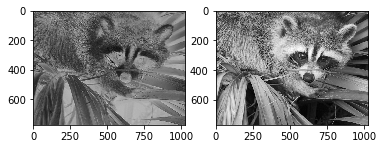

In [190]:
out = F(I, w)

print(out.shape)

plt.subplot(121)
plt.imshow(out[0, 0], cmap='gray')
plt.subplot(122)
plt.imshow(img, cmap='gray')